# An example of undersampling

In [2]:
#  Importing package

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [3]:
# fixing random
# creating a random generator
rng = np.random.default_rng(42)

In [4]:
# creating our data
y = (rng.integers(0, 15, 1000) > 1).astype(int)
x = np.array([rng.normal(loc=i*3, size=2) for i in y])

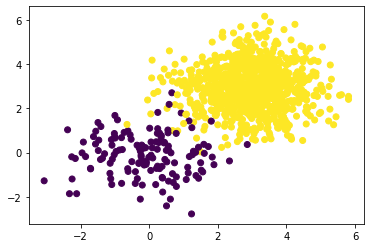

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [8]:
# shuffle the dataset
# keep the original data, by creating new arrays, x_s, and y_s
shuffle = rng.permutation(len(y))
x_s = x[shuffle]
y_s = y[shuffle]

In [9]:
# create a stratified splitter from scikit-learn
#
# it will split the dataset in 2 part, keeping the same proportion of each
# class in each split
skf = StratifiedKFold(n_splits=2)
# the index of both dataset
train_index_0,  test_index = [i[0] for i in skf.split(x_s, y_s)]

In [11]:
# compute which class has the lowest occurence in the train dataset
lowest = np.min(np.unique(y_s[train_index_0], return_counts=True)[1])

In [ ]:
# cut all the other class to the number of occurence of the least present class
# in the training dataset
#
# if there's 400 blue and 100 red, after this there will be 100 blue and 100 red
train_index = train_index_0[np.concatenate(
    [np.where(y_s[train_index_0] == i)[0][:lowest]
     for i in np.unique(y_s)])]